In [2]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [3]:
files = ['bfs']

In [4]:
def create_bins(tmap):
    funnyMap = AutoDict()
    for sk in tmap:
        for cta in tmap[sk]:
            for sit in tmap[sk][cta]:
                for rk in tmap[sk][cta][sit]:
                    for rcta in sorted(tmap[sk][cta][sit][rk]):
                        for rit in tmap[sk][cta][sit][rk][rcta]:
                            recv = tmap[sk][cta][sit][rk][rcta][rit]
                            if not funnyMap[sit][rit]:
                                funnyMap[sit][rit] = 0
                            funnyMap[sit][rit] += recv["size"]
    #pp.pprint(funnyMap)
    return funnyMap

In [7]:
vols = {}
f = {}
for app in files:
    tmap = pickle.load( open('../data/'+app+'.transfermap', "rb"))
    f[app] = create_bins(tmap)


In [8]:
app = 'bfs'
ll = {}
ll[1] = 0
ll[2] = 0
ll[3] = 0
pylab.rcParams['figure.figsize'] = (10, 7)
for sit in f[app]:
    for rit in f[app][sit]:
        d = rit-sit
        ll[d] += f[app][sit][rit]

{1: 4001623, 2: 1763736, 3: 1765359}


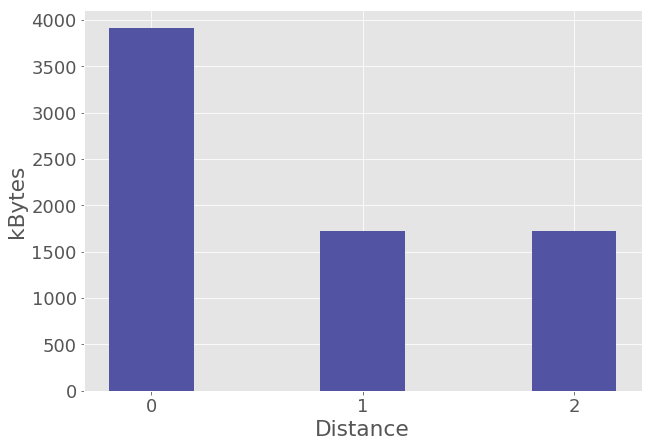

In [20]:
pp.pprint(ll)
ind = np.arange(len(ll))
pylab.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})
width = 0.4
cmap = matplotlib.cm.get_cmap('tab20b')
c = cmap.colors
vols = [ll[1]/1024, ll[2]/1024, ll[3]/1024]
plt.bar(ind, vols, color=c[1], width=width)
plt.xticks(ind, [0,1,2])
plt.ylabel('kBytes')
plt.xlabel('Distance')
filename = '../plots/distances.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()